<a href="https://colab.research.google.com/github/flaviajb/evasaoEscolar/blob/main/Evasao_Supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprendizado supervisionado - Evasão**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a tendência de um aluno se tornar evadido com base em alguns fatores acadêmicos e sociais. 

Os dados foram extraídos do portal https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados . Para este estudo serão considerados os anos de 2012, 2013, 2014, 2015 e 2016.

# Pré-processamento

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Lendo os datasets previamente limpos

In [3]:
m12 = pd.read_csv('/content/drive/MyDrive/DataScienceUP/EvasaoEscolar/Datasets/DatasetsFiltrados/evasão_12.csv')
m13 = pd.read_csv('/content/drive/MyDrive/DataScienceUP/EvasaoEscolar/Datasets/DatasetsFiltrados/evasão_13.csv')
m14 = pd.read_csv('/content/drive/MyDrive/DataScienceUP/EvasaoEscolar/Datasets/DatasetsFiltrados/evasão_14.csv')
m15 = pd.read_csv('/content/drive/MyDrive/DataScienceUP/EvasaoEscolar/Datasets/DatasetsFiltrados/evasão_15.csv')
m16 = pd.read_csv('/content/drive/MyDrive/DataScienceUP/EvasaoEscolar/Datasets/DatasetsFiltrados/evasão_16.csv')

In [4]:
m12.drop(columns=['Unnamed: 0'], inplace=True)
m13.drop(columns=['Unnamed: 0'], inplace=True)
m14.drop(columns=['Unnamed: 0'], inplace=True)
m15.drop(columns=['Unnamed: 0'], inplace=True)
m16.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
m12['Ano'] = 2012
m13['Ano'] = 2013
m14['Ano'] = 2014
m15['Ano'] = 2015
m16['Ano'] = 2016

Concatenando os datasets em um único

In [6]:
evasao = pd.concat([m12, m13, m14, m15, m16])

In [7]:
evasao.head()

,ID,Idade,Necessidade_especial,Cegueira,Baixa_visao,Surdez,Def_auditiva,Surdocegueira,Def_fisica,Def_intelectual,...,Tipo_turma_Não se aplica,Tipo_turma_Unidade prisional,Localizacao_Rural,Localizacao_Urbana,Administracao_Federal,Administracao_Municipal,Administracao_Privada,Ano,Sexo_M,Unificada_Multietapa
0,1.100036e+11,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1,0,0,0,2012,NaN,NaN
1,1.100110e+11,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1,0,0,0,2012,NaN,NaN
2,1.100167e+11,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1,0,0,0,2012,NaN,NaN
3,1.100174e+11,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1,0,1,0,2012,NaN,NaN
4,1.100192e+11,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1,0,0,1,2012,NaN,NaN


Listando as colunas do dataset

In [ ]:
evasao.columns.tolist()

['ID',
 'Idade',
 'Necessidade_especial',
 'Cegueira',
 'Baixa_visao',
 'Surdez',
 'Def_auditiva',
 'Surdocegueira',
 'Def_fisica',
 'Def_intelectual',
 'Def_multipla',
 'Autismo',
 'Asperger',
 'Rett',
 'Transtorno_DI',
 'Superdotacao',
 'Etapa_ensino',
 'ID_escola',
 'Status',
 'Etnia_Branca',
 'Etnia_Indígena',
 'Etnia_Não Declarada',
 'Etnia_Parda',
 'Etnia_Preta',
 'Nacionalidade_Brasileiro',
 'Nacionalidade_Extrangeiro',
 'Nacionalidade_Naturalizado',
 'Zona_res_Urbana',
 'Outro_local_aula_Hospital',
 'Outro_local_aula_Não recebe',
 'Unificada_Multi',
 'Unificada_Não',
 'Tipo_turma_Classe Hospitalar',
 'Tipo_turma_Não se aplica',
 'Tipo_turma_Unidade prisional',
 'Localizacao_Rural',
 'Localizacao_Urbana',
 'Administracao_Federal',
 'Administracao_Municipal',
 'Administracao_Privada',
 'Ano',
 'Sexo_M',
 'Unificada_Multietapa']

In [ ]:
evasao.shape

(829709, 43)

#Transformando as variáveis categóricas nominais em variáveis categóricas ordinais

In [8]:
evasao2 = pd.DataFrame.copy(evasao)

Das colunas do dataset que não possuem dados numéricos, iremos utilizar apenas a coluna "Status". Para esse estudo, o target será a evasão, dessa forma, os demais status serão classificados como 0 e o status evadido como 1.

In [9]:
evasao2['Status'].replace({'repetente': 0, 'aprovado': 0, 'evadido': 1}, inplace=True)

Excluindo colunas não utilizadas.

In [10]:
evasao2.drop(columns=[
 'ID', 
 'ID_escola',
 'Etnia_Branca',
 'Etnia_Indígena',
 'Etnia_Não Declarada',
 'Etnia_Parda',
 'Etnia_Preta',
 'Nacionalidade_Brasileiro',
 'Nacionalidade_Extrangeiro',
 'Nacionalidade_Naturalizado',
 'Zona_res_Urbana',
 'Outro_local_aula_Hospital',
 'Outro_local_aula_Não recebe',
 'Unificada_Multi',
 'Unificada_Não',
 'Tipo_turma_Classe Hospitalar',
 'Tipo_turma_Não se aplica',
 'Tipo_turma_Unidade prisional',
 'Localizacao_Rural',
 'Localizacao_Urbana',
 'Administracao_Federal',
 'Administracao_Municipal',
 'Administracao_Privada',
 'Ano',
 'Sexo_M',
 'Unificada_Multietapa'
], inplace=True)

In [11]:
evasao2.head()

,Idade,Necessidade_especial,Cegueira,Baixa_visao,Surdez,Def_auditiva,Surdocegueira,Def_fisica,Def_intelectual,Def_multipla,Autismo,Asperger,Rett,Transtorno_DI,Superdotacao,Etapa_ensino,Status
0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0
1,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1
2,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0
3,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1
4,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0


Exibindo os tipos de dados das colunas do dataset. Todas com variáveis categóricas ordinais.

In [12]:
evasao2.dtypes

Idade                   float64
Necessidade_especial    float64
Cegueira                float64
Baixa_visao             float64
Surdez                  float64
Def_auditiva            float64
Surdocegueira           float64
Def_fisica              float64
Def_intelectual         float64
Def_multipla            float64
Autismo                 float64
Asperger                float64
Rett                    float64
Transtorno_DI           float64
Superdotacao            float64
Etapa_ensino            float64
Status                    int64
dtype: object

Com a exclusão das colunas não utilizadas, o número de colunas foi reduzido de 43 para 17.

In [ ]:
evasao2.shape

(829709, 17)

# Atributos previsores e alvo

A seguir, a criação dos previsores e alvos para uso nos algoritmos.

alvo = variável que se pretende atingir (evadido ou não).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

In [57]:
previsores = evasao2.iloc[:, 0:11].values

In [58]:
previsores

array([[13.,  0.,  0., ...,  0.,  0.,  0.],
       [14.,  0.,  0., ...,  0.,  0.,  0.],
       [12.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 6.,  0.,  0., ...,  0.,  0.,  0.],
       [ 7.,  0.,  0., ...,  0.,  0.,  0.],
       [ 6.,  0.,  0., ...,  0.,  0.,  0.]])

In [59]:
previsores.shape

(829709, 11)

In [60]:
alvo = evasao2.iloc[:, 11].values

In [61]:
alvo

array([0., 0., 0., ..., 0., 0., 0.])

In [62]:
alvo.shape

(829709,)

# Análise das escalas dos atributos (Escalonamento)

alvo = variável que se pretende atingir (evadido ou não).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

Padronização

In [63]:
evasao2.describe()

,Idade,Necessidade_especial,Cegueira,Baixa_visao,Surdez,Def_auditiva,Surdocegueira,Def_fisica,Def_intelectual,Def_multipla,Autismo,Asperger,Rett,Transtorno_DI,Superdotacao,Etapa_ensino,Status
count,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000,829709.000000
mean,10.066539,0.020222,0.000099,0.000828,0.000710,0.000489,0.000001,0.002243,0.013174,0.000928,0.001290,0.000253,0.000007,0.001878,0.000833,4.630772,0.081774
std,2.670104,0.140757,0.009941,0.028763,0.026634,0.022115,0.001098,0.047307,0.114022,0.030450,0.035888,0.015907,0.002689,0.043293,0.028847,2.328576,0.274021
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000


In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [66]:
previsores_esc

array([[ 1.09863237, -0.14366244, -0.00994181, ..., -0.11554386,
        -0.03047783, -0.0359343 ],
       [ 1.47314983, -0.14366244, -0.00994181, ..., -0.11554386,
        -0.03047783, -0.0359343 ],
       [ 0.72411491, -0.14366244, -0.00994181, ..., -0.11554386,
        -0.03047783, -0.0359343 ],
       ...,
       [-1.52298986, -0.14366244, -0.00994181, ..., -0.11554386,
        -0.03047783, -0.0359343 ],
       [-1.1484724 , -0.14366244, -0.00994181, ..., -0.11554386,
        -0.03047783, -0.0359343 ],
       [-1.52298986, -0.14366244, -0.00994181, ..., -0.11554386,
        -0.03047783, -0.0359343 ]])

In [67]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9,10
0,1.098632,-0.143662,-0.009942,-0.028787,-0.026653,-0.022126,-0.001098,-0.047413,-0.115544,-0.030478,-0.035934
1,1.473150,-0.143662,-0.009942,-0.028787,-0.026653,-0.022126,-0.001098,-0.047413,-0.115544,-0.030478,-0.035934
2,0.724115,-0.143662,-0.009942,-0.028787,-0.026653,-0.022126,-0.001098,-0.047413,-0.115544,-0.030478,-0.035934
3,0.724115,-0.143662,-0.009942,-0.028787,-0.026653,-0.022126,-0.001098,-0.047413,-0.115544,-0.030478,-0.035934
4,0.349597,-0.143662,-0.009942,-0.028787,-0.026653,-0.022126,-0.001098,-0.047413,-0.115544,-0.030478,-0.035934
...,...,...,...,...,...,...,...,...,...,...,...
829704,-0.399437,-0.143662,-0.009942,-0.028787,-0.026653,-0.022126,-0.001098,-0.047413,-0.115544,-0.030478,-0.035934
829705,-0.399437,-0.143662,-0.009942,-0.028787,-0.026653,-0.022126,-0.001098,-0.047413,-0.115544,-0.030478,-0.035934
829706,-1.522990,-0.143662,-0.009942,-0.028787,-0.026653,-0.022126,-0.001098,-0.047413,-0.115544,-0.030478,-0.035934
829707,-1.148472,-0.143662,-0.009942,-0.028787,-0.026653,-0.022126,-0.001098,-0.047413,-0.115544,-0.030478,-0.035934


# Bases de treino e teste

A seguir, a criação das bases de treino e teste para serem utilizadas nos algoritmos.

In [68]:
from sklearn.model_selection import train_test_split

Utilizaremos o test size de 10%, uma vez que o target evasão representa 0.08% dos dados do dataset total.

In [69]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.1, random_state = 0)

Conforme os parametros acima, a seguir, o tamanho de cada uma das bases.

In [70]:
x_treino.shape

(746738, 11)

In [71]:
x_teste.shape

(82971, 11)

In [72]:
y_treino.shape

(746738,)

In [73]:
y_teste.shape

(82971,)

# Árvore de decisão

A seguir, o uso do modelo de árvore de decisão.

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [75]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=3)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.375, 0.875, 'X[1] <= 3.409\nentropy = 0.003\nsamples = 746738\nvalue = [746552, 186]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 731648\nvalue = [731648, 0]'),
 Text(0.5, 0.625, 'X[8] <= 4.27\nentropy = 0.096\nsamples = 15090\nvalue = [14904, 186]'),
 Text(0.25, 0.375, 'X[7] <= 10.522\nentropy = 0.216\nsamples = 5260\nvalue = [5079, 181]'),
 Text(0.125, 0.125, 'entropy = 0.254\nsamples = 4178\nvalue = [4000, 178]'),
 Text(0.375, 0.125, 'entropy = 0.028\nsamples = 1082\nvalue = [1079, 3]'),
 Text(0.75, 0.375, 'X[0] <= -1.336\nentropy = 0.006\nsamples = 9830\nvalue = [9825, 5]'),
 Text(0.625, 0.125, 'entropy = 0.061\nsamples = 141\nvalue = [140, 1]'),
 Text(0.875, 0.125, 'entropy = 0.005\nsamples = 9689\nvalue = [9685, 4]')]

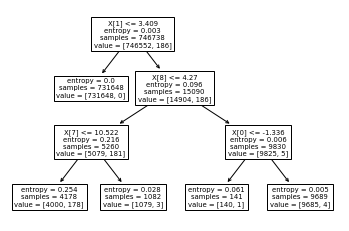

In [76]:
tree.plot_tree(_arvore)

In [77]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([0., 0., 0., ..., 0., 0., 0.])

In [78]:
y_teste

array([0., 0., 0., ..., 0., 0., 0.])

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [80]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 99.97%


In [81]:
confusion_matrix(y_teste, previsoes_arvore)

array([[82947,     0],
       [   24,     0]])

In [82]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     82947
         1.0       0.00      0.00      0.00        24

    accuracy                           1.00     82971
   macro avg       0.50      0.50      0.50     82971
weighted avg       1.00      1.00      1.00     82971



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Análise dados de treino

In [ ]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.9997509166534982

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0))

Acurácia: 99.98%


In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[746552,      0],
       [   186,      0]])

# Random Forest

A seguir, o uso do modelo Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=0, max_depth=4)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=150,
                       random_state=0)

In [ ]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_teste

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 99.97%


In [ ]:
confusion_matrix(y_teste, previsoes_random)

array([[82947,     0],
       [   24,     0]])

In [ ]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     82947
         1.0       0.00      0.00      0.00        24

    accuracy                           1.00     82971
   macro avg       0.50      0.50      0.50     82971
weighted avg       1.00      1.00      1.00     82971



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Análise dados de treino

In [ ]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.9997509166534982

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[746552,      0],
       [   186,      0]])

# Regressão logística

A seguir, o uso do modelo Regressão Logística.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistica = LogisticRegression(random_state=1, max_iter=1500, penalty="l2", tol=0.0001, C=2, solver="lbfgs")
logistica.fit(x_treino, y_treino)

LogisticRegression(C=2, max_iter=1500, random_state=1)

In [ ]:
logistica.intercept_

array([-15.38185989])

In [ ]:
logistica.coef_

array([[ 0.18259027,  1.867763  , -0.09674628, -0.11574164, -0.2581813 ,
        -0.21716668, -0.00959748, -0.17059514, -0.62515002, -0.06723857,
        -0.16193318]])

In [ ]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia: 99.97%


In [ ]:
confusion_matrix(y_teste, previsoes_logistica)

array([[82947,     0],
       [   24,     0]])

In [ ]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     82947
         1.0       0.00      0.00      0.00        24

    accuracy                           1.00     82971
   macro avg       0.50      0.50      0.50     82971
weighted avg       1.00      1.00      1.00     82971



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Análise dos dados de treino

In [ ]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.9997509166534982

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[746552,      0],
       [   186,      0]])

# Considerações finais

Como é percebido, para os três algoritmos (Árvore de decisão, Random Forest e Regressão logística) obtivemos o mesmo resultado (acurácia alta, de 99,75%).
Infelizmente, esse resultado não é real. Por termos um dataset desbalanceado com relação ao target (dataset com aproximadamente 900 mil linhas e target representando apenas 0.08% do total de dados) o aprendizado dos modelos foi comprometido. Nesses casos, o algoritmo assume um padrão e atribui o resultado esperado para todas as linhas, não sendo possível diferenciar os casos verdadeiros.
Uma solução para essa questão é trabalhar manualmente no balanceamento do dataset e, com o modelo pronto, atribuir novos valores para teste.
No modelo a seguir, uma tentativa de balanceamento dos dados com a aplicação do modelo Random Forest https://colab.research.google.com/drive/1-LQXgPQmBG_0Ai-kr3eLcU4RAruYM7s6 .